# Creando y entrenando el modelo
De los archivos generados en el documento **Crear Dataset**, se extraen los datos de los respectivos CSV. En mi caso usaré las muestras que están sampleadas a 8KHz, para el entrenamiento del modelo.

In [29]:
import pandas as pd

X_completo = pd.read_csv('fileX8000.csv', sep=',',header=None)
X_completo.head()

,0,1,2,3,4,5,6,7,8,9,...,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999
0,-0.013273,-0.042601,-0.080638,-0.055170,-0.044443,-0.064419,-0.047288,-0.057819,-0.058834,0.029278,...,-0.004038,0.038039,0.065135,0.059467,0.015023,-0.007802,0.004385,0.014987,0.012070,-0.036266
1,-0.021142,-0.079378,-0.089382,-0.052712,-0.028798,-0.094265,-0.069225,-0.007984,-0.040488,0.060758,...,-0.072834,-0.019352,0.032318,0.049318,0.048659,0.020963,0.020229,0.013798,0.019398,-0.024244
2,0.002626,0.001108,-0.022353,-0.019635,-0.041594,-0.038499,-0.086986,0.003856,-0.002251,-0.021406,...,0.037276,0.066466,0.045844,0.034343,-0.024727,-0.016360,-0.011682,-0.023722,-0.009808,-0.061192
3,-0.023727,-0.043817,-0.029041,-0.019204,-0.005506,0.005745,0.013840,0.022301,0.033232,0.038414,...,-0.019034,-0.030170,-0.034882,-0.030482,-0.029219,-0.026727,-0.019752,-0.012522,-0.011242,-0.012924
4,-0.013385,-0.029699,-0.025594,-0.018382,-0.008203,-0.002810,0.002146,0.016613,0.049522,0.090055,...,-0.006987,-0.011283,-0.014254,-0.017039,-0.020214,-0.017839,-0.018699,-0.017494,-0.015589,-0.022976


Leyendo ahora los valores de *Y*. Aún vienen con su etiqueta en formato de texto.

In [30]:
Y_completo =pd.read_csv('fileY8000.csv', sep=',',header=None)
Y_completo.head()

,0
0,A#dim
1,A#dim
2,A#dim
3,A#dim
4,A#dim


### Convertir arrelgos a Numpy
Ahora se tomará el dataset y se convertirá a un arreglo de numpy para el entrenamiento de la reneuronal.

In [31]:
X_completo = X_completo.to_numpy()
X_completo.shape

(11874, 8000)

In [32]:
Y_completo = Y_completo.to_numpy()
Y_completo.shape

(11874, 1)

### Label encoding para las 36 clases


Ya que la red neuronal es incapaz de clasificar textos se debe de codificar cada una de las etiquetas de los acordes a un valor número. Para ello usaré la librería de *sklearn* que provee dicha facilidad.

In [33]:
from sklearn import preprocessing
# Label encoder para las categorías
le = preprocessing.LabelEncoder()
le.fit(Y_completo)
le.classes_

c:\users\juan diego\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['A#dim', 'A#maj', 'A#min', 'Adim', 'Amaj', 'Amin', 'Bdim', 'Bmaj',
       'Bmin', 'C#dim', 'C#maj', 'C#min', 'Cdim', 'Cmaj', 'Cmin', 'D#dim',
       'D#maj', 'D#min', 'Ddim', 'Dmaj', 'Dmin', 'Edim', 'Emaj', 'Emin',
       'F#dim', 'F#maj', 'F#min', 'Fdim', 'Fmaj', 'Fmin', 'G#dim',
       'G#maj', 'G#min', 'Gdim', 'Gmaj', 'Gmin'], dtype=object)

In [134]:
# Verificando que sigan habiendo 36 clases
len(le.classes_)

36

Se procede a transformar los datos con la instancia del *LABEL ENCODER* creada.

In [35]:
Y_encoded = le.transform(Y_completo)

c:\users\juan diego\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
Y_encoded[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Partiendo entre training y testing

Una parte de los datos se usará para entrenarlo y la otra para verificar que haya aprendido correctamente a clasificar acordes. En este caso yo lo dividiré un 70% para entrenar y un 30% para validación y testeo.

In [37]:
from sklearn.model_selection import train_test_split
# Haciendo el splitting entre training set y test set

x_train, x_test, y_train, y_test = train_test_split(X_completo, Y_encoded, 
                                                    stratify=Y_encoded,
                                                    test_size=0.30, 
                                                    random_state=542,
                                                    shuffle=True)

# Modelo propiamente
Usando KERAS creé un modelo para clasificación donde se utilizan distinas capas. A continuación explico en qué consiste el modelo y su funcionamiento.

## CNN *(redes neuronales convolucionales)*
La CNN es un tipo de Red Neuronal Artificial con aprendizaje supervisado que procesa sus capas imitando al cortex visual del ojo humano para identificar distintas características en las entradas que en definitiva hacen que pueda identificar objetos. A cada etapa expresada en este tipo de neuronas se les llama **convolución**.
Cada convolución consiste en tomar «grupos de pixeles cercanos» de la imagen de entrada e ir operando matemáticamente (usando un producto escalar) contra una pequeña matriz que se llama kernel. Normalmente la matriz se expresa en 2D, pero debido a que estaré procesando sonido las convoluciones se harán en una dimensión, y el Kernel será el largo del filtro que será multiplicado.

![](http://www.diegocalvo.es/wp-content/uploads/2017/07/convoluci%C3%B3n.png)

## Pooling *(buscando valores máximos)*
El *pooling* lo que hace es obtener el mayor de los números usando como base un filtro. La intención de este es jalar los datos más significativos. Normalmente, se hace en 2D, sin embargo, ya que mi capa convolucional fue en 1D, debo de respetar la dimensionalidad.
![](http://www.diegocalvo.es/wp-content/uploads/2017/07/reducci%C3%B3n.png)

## Dropout *(desconectar neuronas)*
Dropout lo que hace es desconectar un porcentaje de neuronas para hacer que cada una de estas aprenda bastante y pueda obtenerse un mejor resultado. En un modelo completamete conectado todas las neuronas están conectadas unas con las otras, en un modelo con 40% de *dropout* se desconectan el 40% de neuronas aleatoriamente.

![](https://cdn-images-1.medium.com/freeze/max/1000/1*zwucz12TmYEaca5OcaPvbA.png?q=20)

## Normalización
Normalizando los datos las distancias de los datos van de 0 a 1 y esto ayuda a la red neuronal a trabajar mejor y a tener menos problemas, pero cuando normalizamos los datos solo la capa de entrada se beneficia de esto, conforme los datos pasan por otras capas ocultas esta normalización se va perdiendo y si tenemos una red neuronal con muchas capas podemos tener problemas con el entrenamiento. El metodo de batch normalization normaliza los datos antes de que pasen por la función de activación en cada capa que de la red neuronal, de esta manera siempre tendremos los datos normalizados.

La idea de este *momentum* en la normalización es que cuando introduzcamos un nuevo mini-batch de entrada (**N** muestras procesadas en paralelo) no se usen una media y una desviación muy distintas a las de la iteración anterior, para lo que se tendrá en cuenta el histórico, y se elegirá una constante que pondere la importancia de los valores del mini-batch actual frente a los valores del anterior.

Ya que los datos son audios se estandariza todo para la misma melodía. 


## LSTM (Long Short Term Memory)
Las LSTM son un tipo especial de redes recurrentes. La característica principal de las redes recurrentes es que la información puede persistir, por lo que, básicamente, pueden «recordar» estados previos y utilizar esta información para decidir cuál será el siguiente. Esta característica las hace muy adecuadas para manejar series cronológicas. Mientras las redes recurrentes estándar pueden modelar dependencias a corto plazo. Ya que lo que estoy prediciendo es sonido la idea es que recuerden las ondas previas del acorde para que den un mejor resultado. Además, cada muestra dura dos segundos, que es suficientemente corta para que LSTM las recuerde y prediga.

![](https://blog.gft.com/es/wp-content/uploads/sites/3/2018/11/image2018-5-30_18-11-1.png)

Para este tipo de redes neuronales se usa como función de activación la tangente hiperbólica por que es fácil de derivar y reduce el costo computacional de calcular una derivada. Además, tiene una similitud con la función sigmoide.

![](https://miro.medium.com/max/1190/1*f9erByySVjTjohfFdNkJYQ.jpeg)

## Bidireccional *(ya no fue usado por restricciones de hardware)*
Se refiere a que existe una nueva capa de neuronas con dos subcapas, una que comunica hacia adelante y otra hacia atrás con el fin de retroalimentar pesos y constantes.

## Capa densa
Quiere decir que todas las neuronas de la capa anterior están conectadas con esta y con la siguiente.
![](https://cdn-images-1.medium.com/freeze/max/1000/0*3eDRoOvU83O6i5bn?q=20)



In [79]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D, Bidirectional, BatchNormalization, LSTM
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

inputs = Input(shape=(8000,1))
x = BatchNormalization(axis=-1, 
                       momentum=0.99, 
                       epsilon=1e-3, 
                       center=True, 
                       scale=True)(inputs)
# Capa Convolucional
x = Conv1D(8, 13, padding='valid', activation='relu', strides=1)(x)
x = MaxPooling1D(2)(x)
x = Dropout(0.1)(x)
# Capa Convolucional
x = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(x)
x = MaxPooling1D(3)(x)
x = Dropout(0.3)(x)
x = LSTM(128,
        return_sequences=False,
        activation='tanh')(x)
# Ya no fue usado
#x = Bidirectional(
#        LSTM(128,
#             return_sequences=False,
#             activation='tanh'),
#        merge_mode='sum'
#        )(x)
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=1e-3, center=True, scale=True)(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(len(le.classes_), activation="softmax")(x)
model = Model(inputs, outputs)
model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 8000, 1)           0         
_________________________________________________________________
batch_normalization_27 (Batc (None, 8000, 1)           4         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 3994, 8)           0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 3994, 8)           0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 3984, 16)          1424      
_________________________________________________________________
max_pooling1d_23 (MaxPooling (None, 1328, 16)          0  

In [80]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])

### Entrenamiento _per se_ del modelo

La capa convolucional de una dimensión espera tres dimensiones, la verdad, la tercera es que el arreglo se pasará de forma lisa.

In [40]:
x_train = x_train.reshape(-1, 8000, 1) # Cambiando la figura para la capa convolucional

In [41]:
x_train.shape

(8311, 8000, 1)

#### One hot encoding para **Y**
Hay que aplicar one hot encoding para Y

In [42]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoder.fit(Y_encoded.reshape(-1, 1)) # entrena
y_train_onehot_encoded = onehot_encoder.transform(y_train.reshape(-1, 1)) # transforma

Probando que hizo bien su trabajo

In [43]:
y_train_onehot_encoded[1].argmax()

12

In [44]:
y_train[1]

12

## **A entrenar se ha dicho**
Ahora se procede al entrenamiento, debido a que LSTM es bastante pesado, el modelo se entrenó por tiempos, generalmente durante la noche o mientras comía, por lo que se hizo lotes de entrenamiento descritos a continuación:
* Ya llevamos 5 épocas con 256
* Ya llevamos 5 a 128
* Ya llevamos 5 épocas con 256
* Ya llevamos 10 épocas con 256
* Ya llevamos 20 épocas con 256
* Ya llevamos 40 épocas con 256
* Ya llevamos 20 épocas con 256
* Ya llevamos 10 épocas con 256
* Ya llevamos 10 épocas con 256
* Ya llevamos 30 épocas con 256
* Ya llevamos 40 épocas con 256
* Ya llevamos 50 épocas con 256
* Ya llevamos 12 épocas con 256
* Ya llevamos 5 épocas con 256

In [142]:
# Batch size es en cuantas porciones divide el dataset gigante para entrenarlo poco a poco
# Épocs es iteraciones
# Validation Split es para crear la validación en base a una porción de cada iteración
# Verbose es para que imprima como va
historial_del_modelo = model.fit(
    x_train, 
    y_train_onehot_encoded,
    epochs=50,  
    batch_size=256, 
    validation_split = 0.1,
    verbose=1
)

Train on 7479 samples, validate on 832 samples
Epoch 1/50
7479/7479 [==============================] - 740s 99ms/step - loss: 0.3218 - accuracy: 0.8830 - val_loss: 1.3048 - val_accuracy: 0.7332
Epoch 2/50
7479/7479 [==============================] - 735s 98ms/step - loss: 0.3391 - accuracy: 0.8774 - val_loss: 1.3210 - val_accuracy: 0.7548
Epoch 3/50
7479/7479 [==============================] - 741s 99ms/step - loss: 0.3482 - accuracy: 0.8730 - val_loss: 1.3636 - val_accuracy: 0.7175
Epoch 4/50
7479/7479 [==============================] - 816s 109ms/step - loss: 0.3295 - accuracy: 0.8818 - val_loss: 1.3663 - val_accuracy: 0.7332
Epoch 5/50
7479/7479 [==============================] - 784s 105ms/step - loss: 0.3371 - accuracy: 0.8748 - val_loss: 1.3394 - val_accuracy: 0.7488
Epoch 6/50
7479/7479 [==============================] - 764s 102ms/step - loss: 0.3214 - accuracy: 0.8790 - val_loss: 1.3671 - val_accuracy: 0.7212
Epoch 7/50
7479/7479 [==============================] - 809s 108ms/s

In [97]:
# Importación de las librerías
import numpy as np
import seaborn as sns
import glob
import tensorflow as tf
import keras
from keras.utils import plot_model
from time import time
import matplotlib.pyplot as plt

%matplotlib inline

def plot_hist(model_history):
    fix,axs=plt.subplots(2,1,figsize=(16,12))
    ax1 = axs[0]
    ax1.plot(model_history.history['accuracy'])
    ax1.plot(model_history.history['val_accuracy'],c='g')
    ax1.set_title('Precisión del modelo',fontsize=16)
    ax1.set_ylabel('Precisión',fontsize=8)
    ax1.set_xlabel('Época',fontsize=8)
    ax1.grid(alpha=0.3)
    ax1.legend(['Training', 'Testing'], loc='upper left')


    # # summarize history for loss
    ax2 = axs[1]
    ax2.plot(model_history.history['loss'],c='r')
    ax2.plot(model_history.history['val_loss'],c='orange')
    ax2.set_title('Función de costo',fontsize=16)
    ax2.set_ylabel('Costo',fontsize=8)
    ax2.set_xlabel('Época',fontsize=8)
    ax2.grid(alpha=0.3)
    ax2.legend(['Entrenamiento', 'Testing'], loc='upper right')
    plt.show()

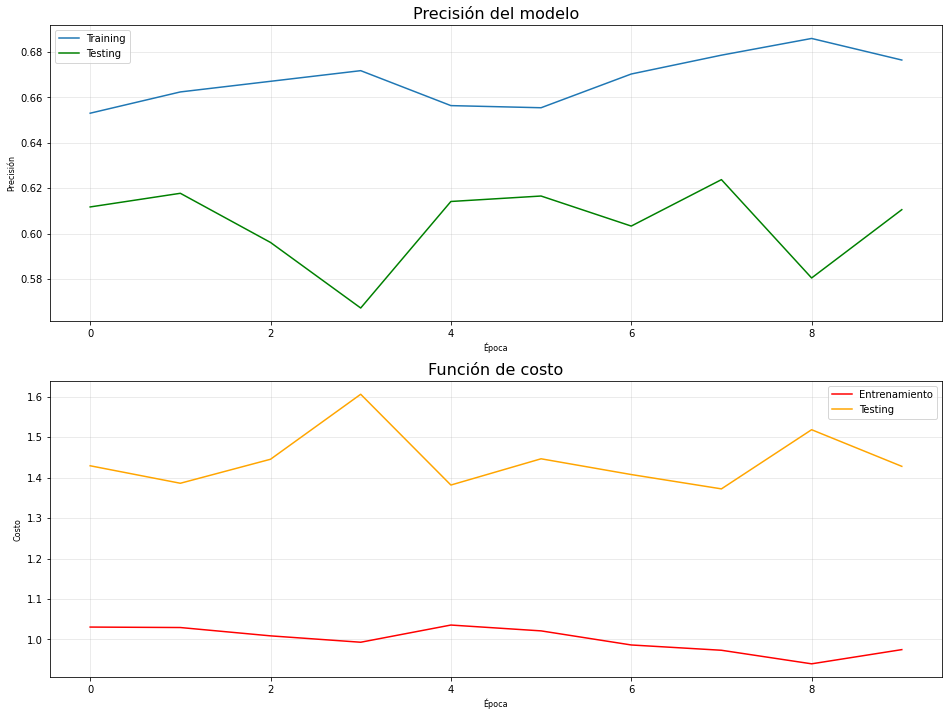

In [109]:
# Graficando el comportamiento del modelo durante el entrenamiento
plot_hist(historial_del_modelo)

### Guardando el modelo con json y h5
Guardando el modelo para futuras implementaciones de este

In [164]:
# Guarda las Thetas
model.save_weights("model.h5")

In [125]:
y_test_onehot_encoded = onehot_encoder.transform(y_test.reshape(-1, 1)) # transforma
y_test_onehot_encoded.shape

(3563, 36)

In [126]:
x_test = x_test.reshape(-1, 8000, 1) # Cambiando la figura para la capa convolucional

In [153]:
scores = model.evaluate(x_test, y_test_onehot_encoded, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 79.37%


In [154]:
# Prediciendo resultados
prob = model.predict(x_test)

In [155]:
res = [i.argmax() for i in prob]
len(res)

3563

In [156]:
len(x_test)

3563

### Matriz de confusión para ver el desempeño del modelo

In [157]:
from sklearn.metrics import confusion_matrix

conf_mat=confusion_matrix(y_test, res)
conf_mat

array([[ 56,   0,   2, ...,   0,   0,   0],
       [  0,  99,   0, ...,   0,   0,   2],
       [  5,   5,  89, ...,   2,   0,   0],
       ...,
       [  0,   0,   2, ...,  49,   0,   2],
       [  0,   0,   0, ...,   0, 103,   3],
       [  0,   5,   0, ...,   1,   8,  84]], dtype=int64)

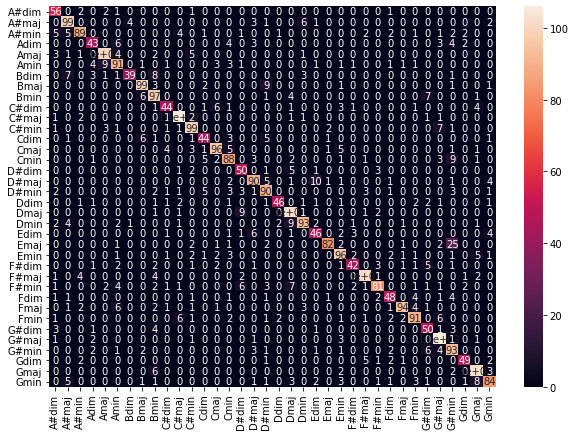

In [158]:
# Graficando la matriz
import seaborn as sn

df_cm = pd.DataFrame(conf_mat, index = [i for i in le.classes_],
                  columns = [i for i in le.classes_])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

#### Guardando modelo con JSON

In [159]:
# Guardar a Json
model_json = model.to_json()
with open("model8000.json", "w") as json_file:
    json_file.write(model_json)

### Cargar el modelo

In [160]:
from keras.models import model_from_json

In [165]:
# cargar modelo
json_file = open('model8000.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# Cargar los pesos en h5
model.load_weights("model.h5")
print("Loaded model from disk")
 
# Compilar el modelo
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])

Loaded model from disk


In [166]:
# Evaluar modelo para ver que sí se guardó
score = model.evaluate(x_test, y_test_onehot_encoded, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 78.50%
